# Download all required libraries

In [15]:
'''Import of libraries for visualization, data preservation and work in directory'''
import os
import re
from stop_words import get_stop_words
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer as rt
deleter_punct = rt('\w+')

In [16]:
'''Import of pretrained model for work with Spanish'''
import spacy
nlp = spacy.load("es_core_news_sm")

# !pip install spacy_spanish_lemmatizer

lemmatizer = nlp.get_pipe("lemmatizer")
print(lemmatizer.mode) 

rule


# Open files, save them as list of texts and dictionary (num_of_issue:text).  \n  Explore them visually.

In [18]:
path = '/Users/tonleon/Desktop/Illinois/Spanish Films DH/Popular_Film_Issues/Estafeta_Cleaned'
os.chdir(path)

In [19]:
# files = os.listdir(path)
# for index, file in enumerate(files):
#     print(file)
#     os.rename(os.path.join(path, file), os.path.join(path, ''.join(['0', file[:3],'_Estafeta.txt'])))
#     print(file)

In [20]:
def read_text_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
        file.close()
    return text

In [21]:
list_estafeta_texts = []
dict_estafeta_texts = {}
for file in sorted(os.listdir()):
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        # call read text file function, save as dictionary and list
        dict_estafeta_texts[file[:3]] = read_text_file(file_path)
        list_estafeta_texts.append(read_text_file(file_path))

In [22]:
dict_estafeta_texts

{'003': 'Señores Eduardo Martínez, Agustín Delgado y Roberto Barros. Ciudad. — Les agradecemos los elogios que hacen de nuestra revista y procuraremos seguir mereciéndolos cada día más.\nC. Puertas de Raido. — Bilbao. — No siendo posible atender de momento su petición, tomamos nota de ella para si se presenta ocasión oportuna.\nPito y Nitus. Ciudad. — Agradecemos sus indicaciones y ofrecimiento, pero nuestro proyecto, respecto a esa página, difiere algo del suyo y lo llevaremos adelante en el momento preciso. Comprenderán perfectamente que no íbamos a meternos en una aventura, sin antes saber adonde nos proponemos ir.\nJaime Giu.— Espulgas Francoli. — Envíe dos pesetas y media por giro postal o en sellos de correo y le mandaremos la revista durante un trimestre.\n',
 '004': 'Ginés García Blanes.— Almería. — Los conocimientos que usted posee son imprescindibles para dedicarse al cinematógrafo, pero le quedan por aprender otras cosas que sólo en los estudios se aprenden. Pruebe usted for

In [8]:
'''Explore length of Estafeta in issues'''

num_length = {}
for key, value in dict_estafeta_texts.items():
    text = deleter_punct.tokenize(value)
    print(text)
    num_length[int(key)] = len(text)

['Señores', 'Eduardo', 'Martínez', 'Agustín', 'Delgado', 'y', 'Roberto', 'Barros', 'Ciudad', 'Les', 'agradecemos', 'los', 'elogios', 'que', 'hacen', 'de', 'nuestra', 'revista', 'y', 'procuraremos', 'seguir', 'mereciéndolos', 'cada', 'día', 'más', 'C', 'Puertas', 'de', 'Raido', 'Bilbao', 'No', 'siendo', 'posible', 'atender', 'de', 'momento', 'su', 'petición', 'tomamos', 'nota', 'de', 'ella', 'para', 'si', 'se', 'presenta', 'ocasión', 'oportuna', 'Pito', 'y', 'Nitus', 'Ciudad', 'Agradecemos', 'sus', 'indicaciones', 'y', 'ofrecimiento', 'pero', 'nuestro', 'proyecto', 'respecto', 'a', 'esa', 'página', 'difiere', 'algo', 'del', 'suyo', 'y', 'lo', 'llevaremos', 'adelante', 'en', 'el', 'momento', 'preciso', 'Comprenderán', 'perfectamente', 'que', 'no', 'íbamos', 'a', 'meternos', 'en', 'una', 'aventura', 'sin', 'antes', 'saber', 'adonde', 'nos', 'proponemos', 'ir', 'Jaime', 'Giu', 'Espulgas', 'Francoli', 'Envíe', 'dos', 'pesetas', 'y', 'media', 'por', 'giro', 'postal', 'o', 'en', 'sellos', 'de

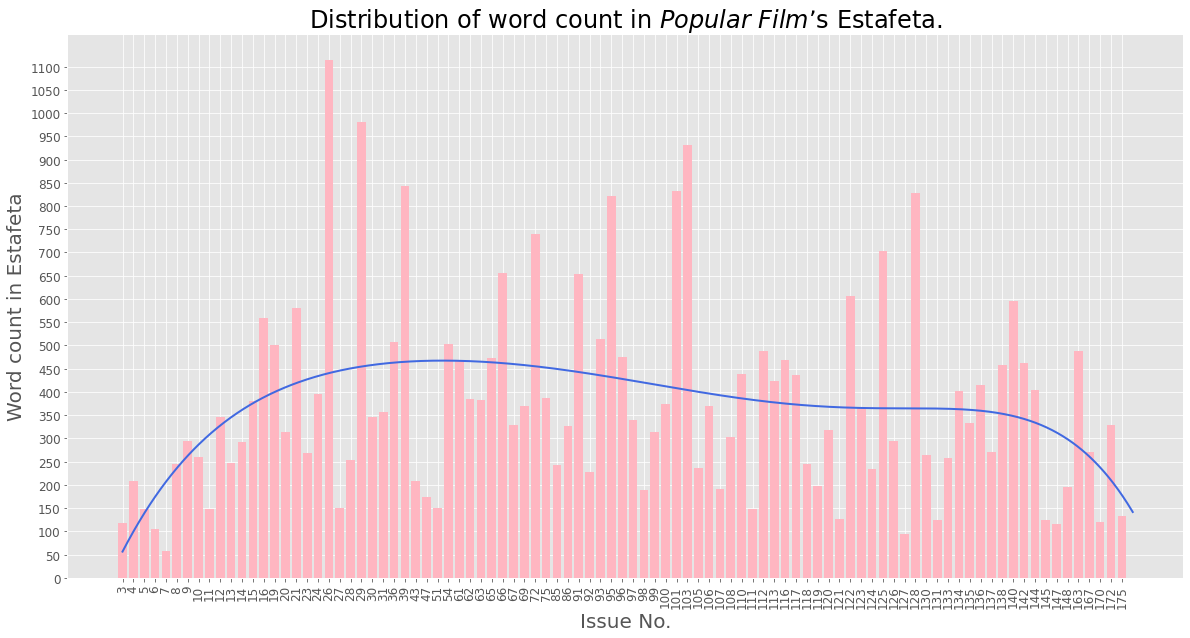

In [9]:


'''Visualize dictionary with issue number and its length'''

fig = plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.bar(np.arange(0, len(num_length.keys())), num_length.values(), width=0.8, color='lightpink')

plt.xticks(np.arange(0, len(num_length.keys())),list(num_length.keys())[::1], fontsize=12, rotation = 90)
plt.yticks(range(0, max(num_length.values()), 50), fontsize=12)

plt.xlabel('Issue No.', fontsize=20)
plt.ylabel('Word count in Estafeta', fontsize=20)
plt.title("Distribution of word count in $\it{Popular}$ $\it{Film’}$s Estafeta.", fontsize = 24)


mymodel = np.poly1d(np.polyfit(list(np.arange(0, len(num_length.keys()))), list(num_length.values()), 6))
myline = np.linspace(0, len(num_length.keys()), max(num_length.values()))
plt.plot(myline, mymodel(myline), linewidth=2, color='royalblue')

plt.savefig('Words_number.pdf', bbox_inches='tight')

plt.show()

# Stop-words - Tokenization - Lemmatization

In [10]:
'''Download stop-words'''

# stop_words = get_stop_words('spanish')
# for letter in range(33,128):
#     stop_words.append(chr(letter))
    
# f = open('spanish_stop_words.txt', 'w')
# for word in stop_words:
#     f.write(word + '\n')
# f.close()
    
# stop_words = set(stop_words)
special_characters = set("1234567890")

In [12]:
stop_words = read_text_file('/Users/tonleon/Desktop/Illinois/Spanish Films DH/spanish_stop_words.txt')

In [13]:
stop_words = set(stop_words.split('\n'))
stop_words

{'',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'algo',
 'ante',
 'b',
 'c',
 'como',
 'contra',
 'cuando',
 'd',
 'donde',
 'durante',
 'e',
 'en',
 'entre',
 'erais',
 'eras',
 'eso',
 'esos',
 'esta',
 'estabais',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estados',
 'estando',
 'estará',
 'estarán',
 'estaré',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'esto',
 'estos',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvisteis',
 'estuviésemos',
 'esté',
 'estén',
 'f',
 'fuera',
 'fuerais',
 'fueran',
 'fueras',
 'fuese',
 'fueseis',
 'fuesen',
 '

In [14]:
'''Use regular expressions to get rid of names and places at the beginning of letters'''

for key, value in dict_estafeta_texts.items():
    text_new = re.sub('\\n.+?[—]|^.+?[—]','\n',value)
    text_new = re.sub('\\n.+?[—]|^.+?[—]', '\n', text_new)
    dict_estafeta_texts[key]=text_new

In [15]:
'''Delete punctuation, check if there are stop-words in the text, lemmatize'''

dict_estafeta_text_lemmatized = {}
for key, value in dict_estafeta_texts.items():
    text = deleter_punct.tokenize(value)
    text_lemmatized = ''
    for word in text:
        doc = nlp(word)
        lemma = [token.lemma_ for token in doc][0]
#         if ' ' in lemma:
#             print(lemma)
        if lemma not in stop_words:
            if any((c in special_characters) for c in word)==False:
                text_lemmatized = text_lemmatized + lemma + ' '
    dict_estafeta_text_lemmatized[key] = text_lemmatized      

In [16]:
'''Create dictionary with word and its amount in our corpus'''

dict_word_num = {}
for value in dict_estafeta_text_lemmatized.values():
    list_of_words = value.split()
    for word in list_of_words:
        if word in dict_word_num:
            dict_word_num[word] +=1
        else:
            dict_word_num[word]=1
            
dict_word_num = dict(sorted(dict_word_num.items(), key=lambda item: item[1], reverse=True))

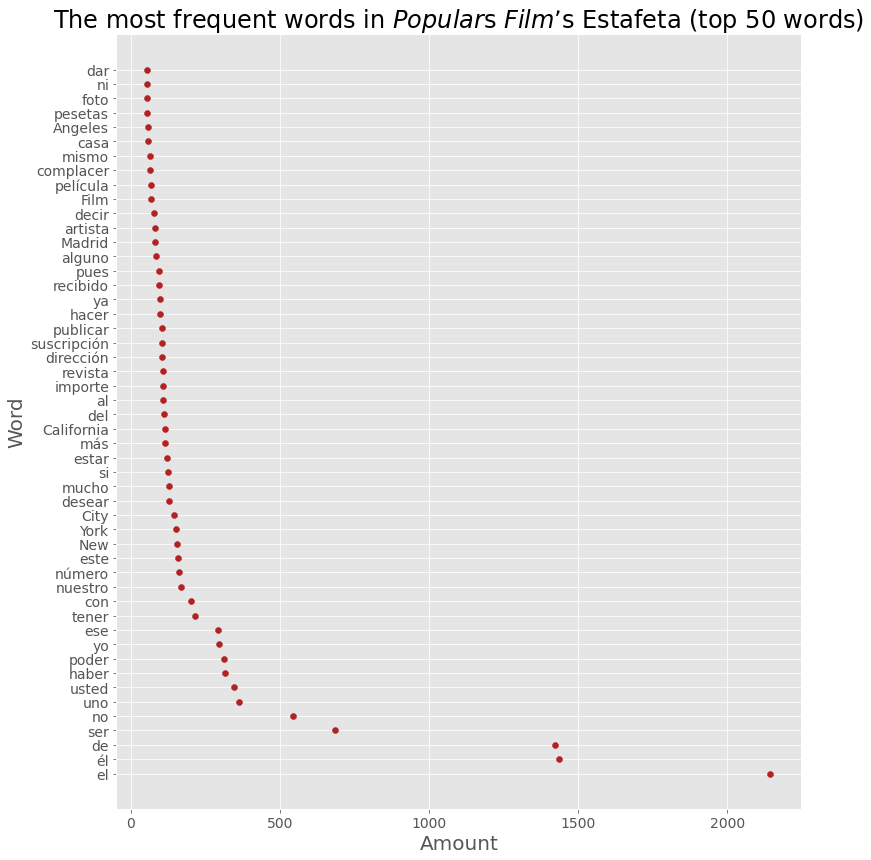

In [17]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(list(dict_word_num.values())[:50], list(dict_word_num.keys())[:50], color='firebrick')
plt.style.use('ggplot')

plt.title('The most frequent words in $\it{Popular}$s $\it{Film’}$s Estafeta (top 50 words)', fontsize=24)
plt.ylabel('Word', fontsize=20)
plt.xlabel('Amount', fontsize=20)

plt.tight_layout()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig('The_most_frquent_words.pdf', bbox_inches='tight')
plt.show()


In [27]:
path_2_save = '/Users/tonleon/Desktop/Spanish Films DH/Popular_Film_Issues/Estafeta_processed_python/'

for key, value in dict_estafeta_text_lemmatized.items():
    with open(os.path.join(path_2_save, '{}_Estafeta.txt'.format(key)), 'w') as file:
        file.write(value)